Using Theano backend.


Epoch 1/1
0s - loss: 0.0078
Epoch 1/1
0s - loss: 0.0199
Epoch 1/1
0s - loss: 0.0125
Epoch 1/1
0s - loss: 0.0074
Epoch 1/1
0s - loss: 0.0070
Epoch 1/1
0s - loss: 0.0059
Epoch 1/1
0s - loss: 0.0055
Epoch 1/1
0s - loss: 0.0051
Epoch 1/1
0s - loss: 0.0047
Epoch 1/1
0s - loss: 0.0045
Epoch 1/1
0s - loss: 0.0042
Epoch 1/1
0s - loss: 0.0041
Epoch 1/1
0s - loss: 0.0040
Epoch 1/1
0s - loss: 0.0038
Epoch 1/1
0s - loss: 0.0038
Epoch 1/1
0s - loss: 0.0037
Epoch 1/1
0s - loss: 0.0036
Epoch 1/1
0s - loss: 0.0036
Epoch 1/1
0s - loss: 0.0036
Epoch 1/1
0s - loss: 0.0035
Epoch 1/1
0s - loss: 0.0035
Epoch 1/1
0s - loss: 0.0034
Epoch 1/1
0s - loss: 0.0034
Epoch 1/1
0s - loss: 0.0034
Epoch 1/1
0s - loss: 0.0033
Epoch 1/1
0s - loss: 0.0033
Epoch 1/1
0s - loss: 0.0033
Epoch 1/1
0s - loss: 0.0033
Epoch 1/1
0s - loss: 0.0032
Epoch 1/1
0s - loss: 0.0032
Epoch 1/1
0s - loss: 0.0032
Epoch 1/1
0s - loss: 0.0031
Epoch 1/1
0s - loss: 0.0031
Epoch 1/1
0s - loss: 0.0031
Epoch 1/1
0s - loss: 0.0031
Epoch 1/1
0s - loss:

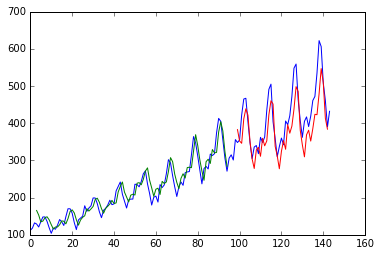

In [1]:
# LSTM for international airline passengers problem with memory
import numpy
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
%matplotlib inline
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)
# fix random seed for reproducibility
numpy.random.seed(7)
# load the dataset
dataframe = pandas.read_csv('./data/international-airline-passengers.csv', usecols=[1], engine='python', skipfooter=3)
dataset = dataframe.values
dataset = dataset.astype('float32')
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
# reshape into X=t and Y=t+1
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = numpy.reshape(testX, (testX.shape[0], testX.shape[1], 1))
# create and fit the LSTM network
batch_size = 1
model = Sequential()
model.add(LSTM(4, batch_input_shape=(batch_size, look_back, 1), stateful=True))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
for i in range(100):
	model.fit(trainX, trainY, nb_epoch=1, batch_size=batch_size, verbose=2, shuffle=False)
	model.reset_states()
# make predictions
trainPredict = model.predict(trainX, batch_size=batch_size)
model.reset_states()
testPredict = model.predict(testX, batch_size=batch_size)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()